In [ ]:
!pip install transformers tensorflow

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# fake_df = pd.read_csv("./Fake.csv", sep=",")
# fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
# true_df = pd.read_csv("./True.csv", sep=",")
# true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
# fake_df["label"] = "Fake"
# true_df["label"] = "True"

In [ ]:
# fake_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [ ]:
# df = pd.concat([fake_df, true_df], axis=0)

In [ ]:
# df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [ ]:
# df["label"].value_counts()

Fake    23481
True    21417
Name: label, dtype: int64

In [ ]:
# df.to_csv("./NewsData.csv", sep=",", index=False)

In [ ]:
df = pd.read_csv("./NewsData.csv", sep=",")

In [ ]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [ ]:
seqlen = df["title"].apply(lambda x: len(x.split()))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


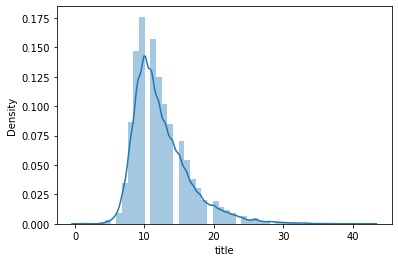

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.distplot(seqlen)

In [ ]:
max(seqlen)

42

In [ ]:
max_length = 30

In [ ]:
model_name = "bert-base-cased"

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_name)

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [ ]:
tokens = tokenizer.encode_plus(
    "hello world",
    max_length=max_length,
    truncation=True,
    padding="max_length",
    add_special_tokens=True,
    return_token_type_ids=False,
    return_attention_mask=True,
    return_tensors="tf",
)

In [ ]:
tokens

{'input_ids': <tf.Tensor: shape=(1, 30), dtype=int32, numpy=
array([[  101, 19082,  1362,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 30), dtype=int32, numpy=
array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>}

In [ ]:
np.array(tokens["input_ids"])[0]

array([  101, 19082,  1362,   102,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0], dtype=int32)

In [ ]:
df["label"] = df["label"].apply(lambda x: 1 if x == "True" else 0)

In [ ]:
df["label"]

0        0
1        0
2        0
3        0
4        0
        ..
44893    1
44894    1
44895    1
44896    1
44897    1
Name: label, Length: 44898, dtype: int64

In [ ]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
all_tokens = []

In [ ]:
for idx, data in enumerate(df["title"]):
    all_tokens.append(
        tokenizer.encode_plus(
            data,
            max_length=max_length,
            truncation=True,
            padding="max_length",
            add_special_tokens=True,
            return_token_type_ids=False,
            return_attention_mask=True,
            return_tensors="tf",
        )
    )

In [ ]:
len(all_tokens)

44898

In [ ]:
all_tokens[0]

{'input_ids': <tf.Tensor: shape=(1, 30), dtype=int32, numpy=
array([[  101,  5554,  8499, 25929,  1116,  3929, 18653,  6824, 19326,
         1158,  1203,  2381,   787,   188,  6721, 24931,   132,  1188,
         1110, 12120,  2050,  2149,  6791,   102,     0,     0,     0,
            0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 30), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0]], dtype=int32)>}

In [ ]:
labels = np.array(df["label"])
labels

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
np.array(all_tokens[0]["input_ids"])

array([[  101,  5554,  8499, 25929,  1116,  3929, 18653,  6824, 19326,
         1158,  1203,  2381,   787,   188,  6721, 24931,   132,  1188,
         1110, 12120,  2050,  2149,  6791,   102,     0,     0,     0,
            0,     0,     0]], dtype=int32)

In [ ]:
X_ids = []
X_masks = []

In [ ]:
for tokens in all_tokens:
    X_ids.append(np.array(tokens["input_ids"]))
    X_masks.append(np.array(tokens["attention_mask"]))

In [ ]:
X_ids = np.array(X_ids)
X_masks = np.array(X_masks)

In [ ]:
X_ids[:2]

array([[[  101,  5554,  8499, 25929,  1116,  3929, 18653,  6824, 19326,
          1158,  1203,  2381,   787,   188,  6721, 24931,   132,  1188,
          1110, 12120,  2050,  2149,  6791,   102,     0,     0,     0,
             0,     0,     0]],

       [[  101,  1987, 12660, 26482,  1158,  8499,  5949,  1200, 15599,
          1174,  1938,  9518, 17855, 15701,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0]]], dtype=int32)

In [ ]:
X_masks[:2]

array([[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 0, 0, 0, 0, 0, 0]],

       [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0]]], dtype=int32)

In [ ]:
labels[:2]

array([0, 0])

In [ ]:
import tensorflow as tf

In [ ]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
ds = tf.data.Dataset.from_tensor_slices((X_ids, X_masks, labels))

In [ ]:
for i in ds.take(1):
    print(i)

(<tf.Tensor: shape=(1, 30), dtype=int32, numpy=
array([[  101,  5554,  8499, 25929,  1116,  3929, 18653,  6824, 19326,
         1158,  1203,  2381,   787,   188,  6721, 24931,   132,  1188,
         1110, 12120,  2050,  2149,  6791,   102,     0,     0,     0,
            0,     0,     0]], dtype=int32)>, <tf.Tensor: shape=(1, 30), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0]], dtype=int32)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [ ]:
def format_data(input_ids, masks, labels):
    return {"input_ids": input_ids[0], "attention_mask": masks[0]}, labels

In [ ]:
ds = ds.map(format_data)

In [ ]:
for i in ds.take(1):
    print(i)

({'input_ids': <tf.Tensor: shape=(30,), dtype=int32, numpy=
array([  101,  5554,  8499, 25929,  1116,  3929, 18653,  6824, 19326,
        1158,  1203,  2381,   787,   188,  6721, 24931,   132,  1188,
        1110, 12120,  2050,  2149,  6791,   102,     0,     0,     0,
           0,     0,     0], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(30,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0], dtype=int32)>}, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [ ]:
ds = ds.shuffle(1000000).batch(32)

In [ ]:
ds_len = len(list(ds))

In [ ]:
ds_len

1404

In [ ]:
train_ds = ds.take(round(0.9 * ds_len))
val_ds = ds.skip(round(0.9 * ds_len))

In [ ]:
from transformers import TFAutoModel

In [ ]:
bert = TFAutoModel.from_pretrained(model_name)

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
from tensorflow import keras

In [ ]:
input_ids = keras.layers.Input(shape=(max_length,), name="input_ids", dtype="int32")
mask = keras.layers.Input(shape=(max_length,), name="attention_mask", dtype="int32")
embeddings = bert(input_ids, attention_mask=mask)[0]
X = keras.layers.GlobalMaxPool1D()(embeddings)
X = keras.layers.BatchNormalization()(X)
X = keras.layers.Dense(128, activation="relu")(X)
X = keras.layers.Dropout(0.1)(X)
X = keras.layers.Dense(32, activation="relu")(X)
y = keras.layers.Dense(2, activation="softmax", name="outputs")(X)

model = keras.Model(inputs=[input_ids, mask], outputs=[y])
model.layers[2].trainable = False

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 30)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 30)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 30,                                          

In [ ]:
optimizer = keras.optimizers.Adam(0.01)
loss = keras.losses.SparseCategoricalCrossentropy()
acc = keras.metrics.SparseCategoricalAccuracy("accuracy")

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=2)

Epoch 1/2
1264/1264 [==============================] - 123s 87ms/step - loss: 0.0338 - accuracy: 0.9909 - val_loss: 0.0146 - val_accuracy: 0.9926
Epoch 2/2
1264/1264 [==============================] - 108s 85ms/step - loss: 0.0517 - accuracy: 0.9871 - val_loss: 0.0150 - val_accuracy: 0.9980


In [ ]:
model.save("model.h5")